# Práctica final de Aprendizaje automático

Docente: Juan Francisco Huguet

Autor: Samson Gasparyan Sargsyan

Asignatura: Aprendizaje Automático

Estudios: Máster Universitario en Sistemas Inteligentes

Centro: Universidad de las Islas Baleares

Curso: 2020/21

Este código se podrá encontrar en el siguiente repositorio:
www.github.com/Samsongas/UIB-MUSI-AA-B1-Final

## Introducción

Airbnb es una plataforma que permite publicar, descubrir y reservar diferentes alojamientos. Dispone de propiedades en más de 192 países repartidas en 33.000 ciudades de todo el mundo. Se creó a finales del año 2008 y hoy en día es uno de los recursos más buscados todo para viajantes. Únicamente en Mallorca dispone de 14900 alojamientos de diferente tipo.


Uno de los problemas que se encuentran los hosts cuando quieren añadir un nuevo alojamiento en la plataforma es determinar el precio de alquiler. En este problema la pregunta que deberá resolver es: ¿qué precio de alquiler poner a una propiedad sabiendo sus características?

Para responder a esta questión disponemos conjunto de datos real de Airbnb para la isla de Mallorca.

Estimaremos el precio directamente a partir de las características de los alojamiento.

## Fase 1: Importación y tratamiento

En esta fase importaremos los datos de un archivo CSV. Después aplicaremos ciertos cambios para obtener un set de datos adecuado para las funciones de sklearn que tenemos a nuestra disposición.

### 1.1. Importación del CSV

Importaremos los datos y los cargaremos en un set de datos (dataframe) de la librería pandas.

In [1]:
import pandas as pd
data = pd.read_csv('data/airbnb.csv',)
data.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11547,https://www.airbnb.com/rooms/11547,20200919153121,2020-09-21,My home at the beach,"Sun, joy, relax, quality, beach & peace.<br />...",NaN,https://a0.muscache.com/pictures/494126/8c151b...,42942,https://www.airbnb.com/users/show/42942,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.93
1,100831,https://www.airbnb.com/rooms/100831,20200919153121,2020-09-21,HOUSE IN MALLORCA - WiFi(ET-3045),<b>The space</b><br />House situated in a quie...,NaN,https://a0.muscache.com/pictures/675527/72b329...,529151,https://www.airbnb.com/users/show/529151,...,10.0,10.0,10.0,ETV-3045,t,1,1,0,0,1.47


### 1.2 Evaluación de los datos

Como podemos ver, hay 74 columnas. A continuación, imprimiremos todas ellas para poder evaluarlas mejor.

In [2]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

Hay una columna con un identificador único, pero de esto no estamos seguros. Para asegurarnos, comprobaremos que el número de valores distintos para esa columna coincide con el número total de columnas.

In [3]:
len(data["id"].unique()) == len(data["id"])

True

Ahora que sabemos que la columna "id" es el identificador único, podemos descartarla puesto que no nos da información relevante. 
Las columnas que usaremos serán las siguientes:

* description : Contendrá, en valor entero, el número de caracteres presentes en la descripción del anuncio, contando también los presentes en la descripción del hospedador.
* latitude
* longitude
* amenities : Contendrá, en valor entero, el número de comodidades disponibles en el alojamiento.
* number_of_reviews
* first_review : Será un número entero que contendrá la fecha de la primera evaluación en días contados desde enero del 2010.
* review_scores_value
* license : Tendrá un valor de 1 o 0 según el alojamiento tenga licencia o no.
* calculated_host_listings_count
* reviews_per_month
* accommodates : capacidad del alojamiento
* bedrooms : habitaciones del alojamiento
* beds : camas del alojamiento
* price

A continuación veremos las columnas que más relevantes son para nosotros. De esta forma veremos el formato de los datos y podremos tratarlo.

In [5]:
reduced_data = data[["latitude","longitude","accommodates",
                     "bedrooms","beds","price"]]
reduced_data

,latitude,longitude,accommodates,bedrooms,beds,price
0,39.51888,2.48182,2,1.0,1.0,$89.00
1,39.76347,3.16255,8,4.0,7.0,$175.00
2,39.66044,3.07165,6,3.0,4.0,$140.00
3,39.61600,3.30121,4,2.0,4.0,$200.00
4,39.56478,2.60333,2,1.0,2.0,$110.00
...,...,...,...,...,...,...
17603,39.76505,3.12689,6,3.0,4.0,$195.00
17604,39.89835,3.03647,9,5.0,8.0,$110.00
17605,39.75437,2.90504,6,3.0,4.0,$179.00
17606,39.54550,2.39348,2,1.0,1.0,$42.00


### 1.3 Creación de un set de datos adaptado

Para la creación de nuestro set de datos adaptado, necesitaremos un poco de programación. A continuación, generamos nuestro set de datos, usando las nuevas funciones.

In [9]:
# Space pre-allocation in order to reduce computing time
df = pd.DataFrame(len(reduced_data)*[6*[0]], columns = ["latitude","longitude",
                                     "accommodates","bedrooms","beds","price"])

for x in range(len(reduced_data)):
    df.loc[x]=[reduced_data[["latitude"]].loc[x][0],reduced_data[["longitude"]].loc[x][0],
               reduced_data[["accommodates"]].loc[x][0],
               reduced_data[["bedrooms"]].loc[x][0],
               reduced_data[["beds"]].loc[x][0],
               float(reduced_data[["price"]].loc[x][0][1:].replace(",",""))]
df

,latitude,longitude,accommodates,bedrooms,beds,price
0,39.51888,2.48182,2,1.0,1.0,89.0
1,39.76347,3.16255,8,4.0,7.0,175.0
2,39.66044,3.07165,6,3.0,4.0,140.0
3,39.61600,3.30121,4,2.0,4.0,200.0
4,39.56478,2.60333,2,1.0,2.0,110.0
...,...,...,...,...,...,...
17603,39.76505,3.12689,6,3.0,4.0,195.0
17604,39.89835,3.03647,9,5.0,8.0,110.0
17605,39.75437,2.90504,6,3.0,4.0,179.0
17606,39.54550,2.39348,2,1.0,1.0,42.0


Después de unos 5 minutos de procesamiento, por fin tenemos nuestros datos en limpio.
Ahora, quitaremos los outliers superiores de los valores de price, accomodates, bedrooms y beds, de modo que aquellos excedan el valor de dos veces la desviación típica más el valor del tercer cuartil quedarán excluídos.
También cambiaremos el orden del dataset para que esté ordenado por precio de forma ascendente.

In [44]:
reducedDf = df[df["accommodates"]<
   (df["accommodates"].quantile(0.75) + 2*df["accommodates"].std())]
reducedDf = reducedDf[reducedDf["bedrooms"]<
   (reducedDf["bedrooms"].quantile(0.75) + 2*reducedDf["bedrooms"].std())]
reducedDf = reducedDf[reducedDf["beds"]<
   (reducedDf["beds"].quantile(0.75) + 2*reducedDf["beds"].std())]
reducedDf = reducedDf[reducedDf["price"]<
   (reducedDf["price"].quantile(0.75) + 2*reducedDf["price"].std())]
reducedDf_p_as = reducedDf.sort_values('price', ascending = True)
reducedDf_p_as = reducedDf_p_as.reset_index()
reducedDf_p_as

,latitude,longitude,accommodates,bedrooms,beds,price
13824,39.36671,2.94222,1,1.0,1.0,10.0
14311,39.47818,2.52299,8,4.0,6.0,10.0
17334,39.36524,2.93810,2,1.0,2.0,10.0
11865,39.77654,2.96248,6,5.0,8.0,10.0
3196,39.57386,2.41675,1,1.0,1.0,10.0
...,...,...,...,...,...,...
14437,39.85785,3.04591,8,4.0,6.0,1015.0
10188,39.53859,2.57245,4,2.0,2.0,1016.0
8501,39.43189,2.74887,8,4.0,8.0,1018.0
898,39.73316,3.05981,6,4.0,7.0,1020.0


También identificaremos los núcleos de viviendas que tengan un precio alto. Para ello, emplearemos un mapa de color.

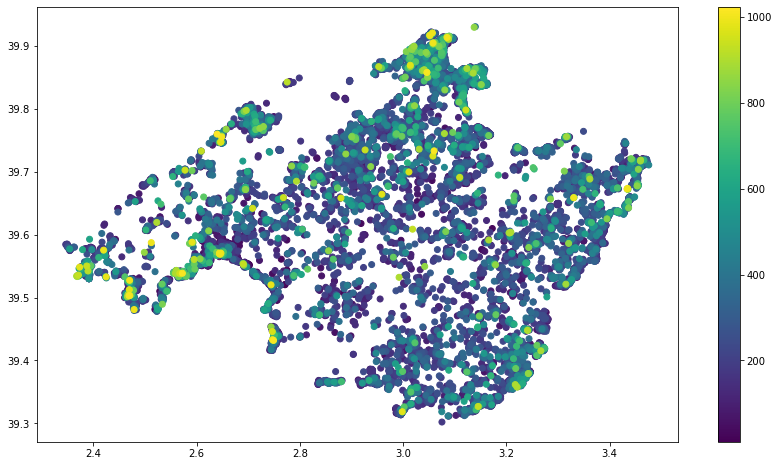

In [45]:
# En primer lugar, delimitamos los valores máximos y mínimos de altitud y latitud,
# lo cual nos ayudará a conocer los límites de nuestro mapa
# [[superior izquierdo],[inferior derecho]]
max_lon = reducedDf_p_as["longitude"].max()
min_lon = reducedDf_p_as["longitude"].min()
max_lat = reducedDf_p_as["latitude"].max()
min_lat = reducedDf_p_as["latitude"].min()
limites = [[min_lon, max_lat],
           [max_lon, min_lat]]

# Veamos ahora nuestro mapa de calor
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

# Importante saber la relación entre x e y para no deformar el plot al cambiar el tamaño
proporcion = (max_lon-min_lon)/(max_lat-min_lat)

f = lambda x: np.sign(x) * np.power(abs(x), 1./3)

norm = mpl.colors.Normalize()

plt.subplots(figsize=(8*proporcion, 8))
plt.scatter(reducedDf_p_as["longitude"].values,
            reducedDf_p_as["latitude"].values,
            c=reducedDf_p_as["price"].values,
            vmin=reducedDf_p_as["price"].min(),
            vmax=reducedDf_p_as["price"].max())

plt.colorbar()

plt.show()

Como podemos ver, los resultados son claros. Tenemos un incremento sustancial del precio en El Arenal, la Bahía de Palma en general, la ensenada de Santa Ponsa, Deyá, Puerto de Pollensa y valores más altos en las zonas de playa.

Está claro que hay una correlación entre el precio medio de la zona en la que se encuentra el alojamiento y el precio final, pero si tenemos en cuenta los valores de latitud y longitud y los comparamos linealmente no dará ningún resultado significativo. Es por tanto que debemos calcular los precios medios de cada zona.

Para ello, haremos una cuadrícula de la misma proporción de la isla, haremos la media de precio para cada zona y sustituiremos la latitud y la longitud de nuestro set de datos por el precio medio de la zona en la cual se encuentra la vivienda.

In [183]:
cuadricula = np.zeros((int(100*proporcion), 100,2))
for row in reducedDf_p_as.iterrows():
    x = int(100*proporcion*(row[1]["longitude"] - min_lon)/(max_lon-min_lon))-1 
    y = int(100*(row[1]["latitude"] - min_lat)/(max_lat-min_lat))-1
    cuadricula[x,y,0] = cuadricula[x,y,0] + row[1]["price"]
    cuadricula[x,y,1] = cuadricula[x,y,1] + 1
    
mediaPrecios = np.zeros((int(100*proporcion), 100))
for x in range(int(100*proporcion)):
    for y in range(100):
        if (cuadricula[x,y,1]!=0):
            mediaPrecios[x,y] = cuadricula[x,y,0]/cuadricula[x,y,1]

Ploteemos para ver el resultado.

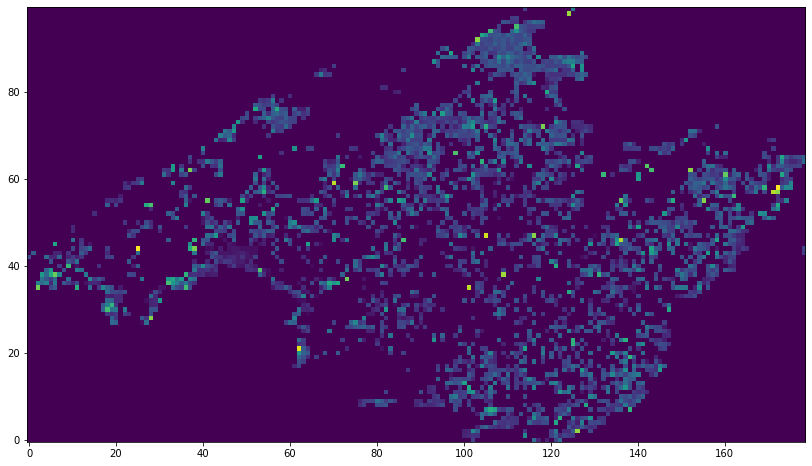

In [202]:
plt.figure(figsize=(int(8*proporcion),8))
plt.imshow(mediaPrecios.T, origin="lower")
plt.show()

Es interesante. Pero... ¿y si le aplicamos un filtrado Gaussiano para que los cambios entre regiones sean más suaves?

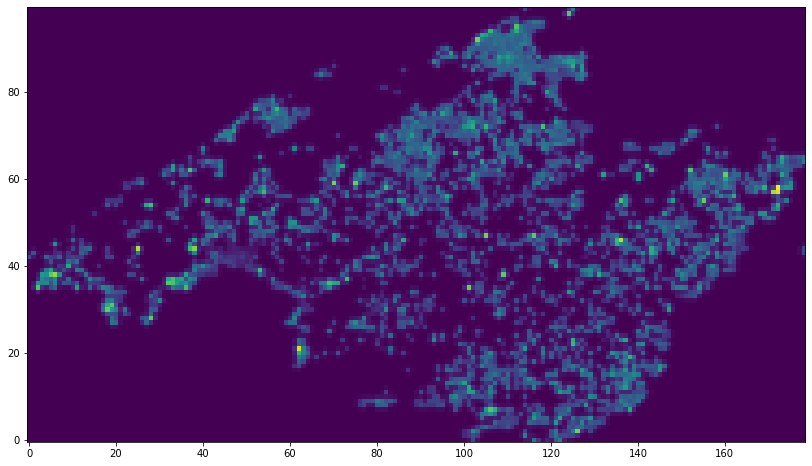

In [203]:
from scipy.ndimage.filters import gaussian_filter
medPreGauss = gaussian_filter(mediaPrecios,sigma=0.5)
plt.figure(figsize=(int(8*proporcion),8))
plt.imshow(medPreGauss.T, origin="lower")
plt.show()

Muchísimo mejor. Ahora que ya tenemos los valores, creemos un dataset final asignando a cada uno de los alojamientos el precio medio de su zona.

In [247]:
# Space pre-allocation in order to reduce computing time
fDf = pd.DataFrame(len(reducedDf_p_as)*[5*[0]], columns = ["average_price",
                                     "accommodates","bedrooms","beds","price"])

def ind_lat(lat):
    return int(100*(lat - min_lat)/(max_lat-min_lat))-1
def ind_long(long):
    return int(100*proporcion*(long - min_lon)/(max_lon-min_lon))-1
    
def average_price(lat,long):
    return medPreGauss.T[ind_lat(lat), ind_long(long)]

for x in range(len(reducedDf_p_as)):
    fDf.loc[x]=[average_price(reducedDf_p_as[["latitude"]].loc[x][0],
                             reducedDf_p_as[["longitude"]].loc[x][0],),
               float(reducedDf_p_as[["accommodates"]].loc[x][0]),
               reducedDf_p_as[["bedrooms"]].loc[x][0],
               reducedDf_p_as[["beds"]].loc[x][0],
               reducedDf_p_as[["price"]].loc[x][0]]
fDf

,average_price,accommodates,bedrooms,beds,price
0,141.048686,1.0,1.0,1.0,10.0
1,247.718821,8.0,4.0,6.0,10.0
2,141.048686,2.0,1.0,2.0,10.0
3,186.440237,6.0,5.0,8.0,10.0
4,145.773819,1.0,1.0,1.0,10.0
...,...,...,...,...,...
16624,333.610364,8.0,4.0,6.0,1015.0
16625,406.191747,4.0,2.0,2.0,1016.0
16626,242.789251,8.0,4.0,8.0,1018.0
16627,246.589944,6.0,4.0,7.0,1020.0


Ahora sólo falta normalizar los valores.

In [297]:
from sklearn import preprocessing
x = fDf.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
fDf = pd.DataFrame(x_scaled)
fDf.reset_index()
fDf.columns = ["average_price", "accommodates","bedrooms","beds","price"]
fDf.sample(10)

,average_price,accommodates,bedrooms,beds,price
9710,0.247381,0.583333,0.6,0.6,0.187377
14595,0.392954,0.583333,0.6,0.7,0.344181
49,0.093678,0.083333,0.0,0.2,0.008876
11680,0.191975,0.250000,0.4,0.3,0.228797
7629,0.181084,0.083333,0.0,0.1,0.151874
15947,0.290714,0.666667,0.6,0.5,0.524655
3204,0.169857,0.333333,0.2,0.4,0.083826
4012,0.093441,0.166667,0.0,0.1,0.096647
12555,0.167734,0.583333,0.6,0.5,0.251479
12044,0.255449,0.416667,0.4,0.6,0.236686


Perfecto. Ya tenemos nuestros datos.

# Fase 2: Selección de modelo y ajuste de hiper-parametros

En esta sección trataremos los dos siguientes puntos:

1. Selección de Modelo: Encontrando el compromiso entre Bies y Varianza
2. Ajuste de hiper-parámetros

## 2.2 Selección de modelo
En primer lugar, haremos un plot de la correlación entre variables.

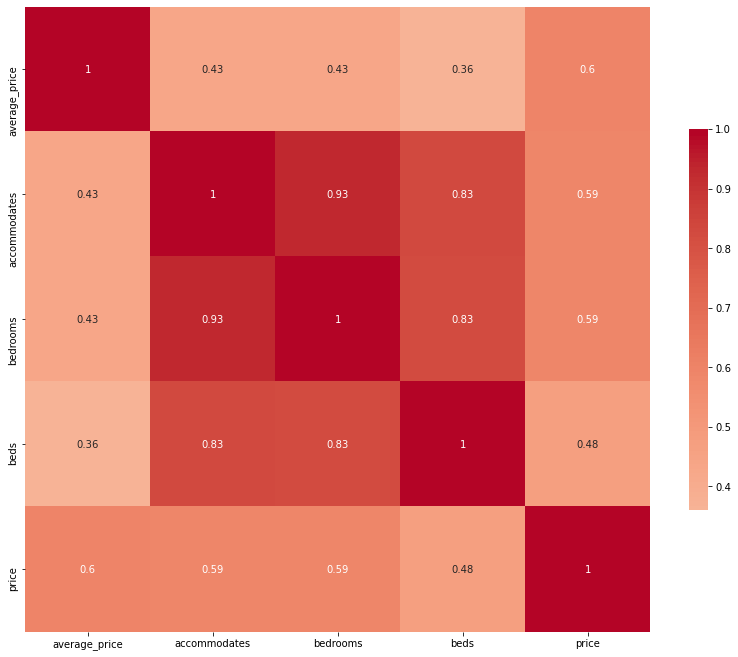

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

# Computamos la matriz de correlación
corr = fDf.corr()

# Creamos una figura de tamaño 14, 14
f, ax = plt.subplots(figsize=(14, 14))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .5}, annot=True, ax=ax)

Observamos con satisfacción que nuestros esfuerzos por correlar la latitud y la longitud con el precio, creando una cuadrícula, han dado sus frutos.

Escogemos pues todas las variables y procedemos a realizar un pairplot.

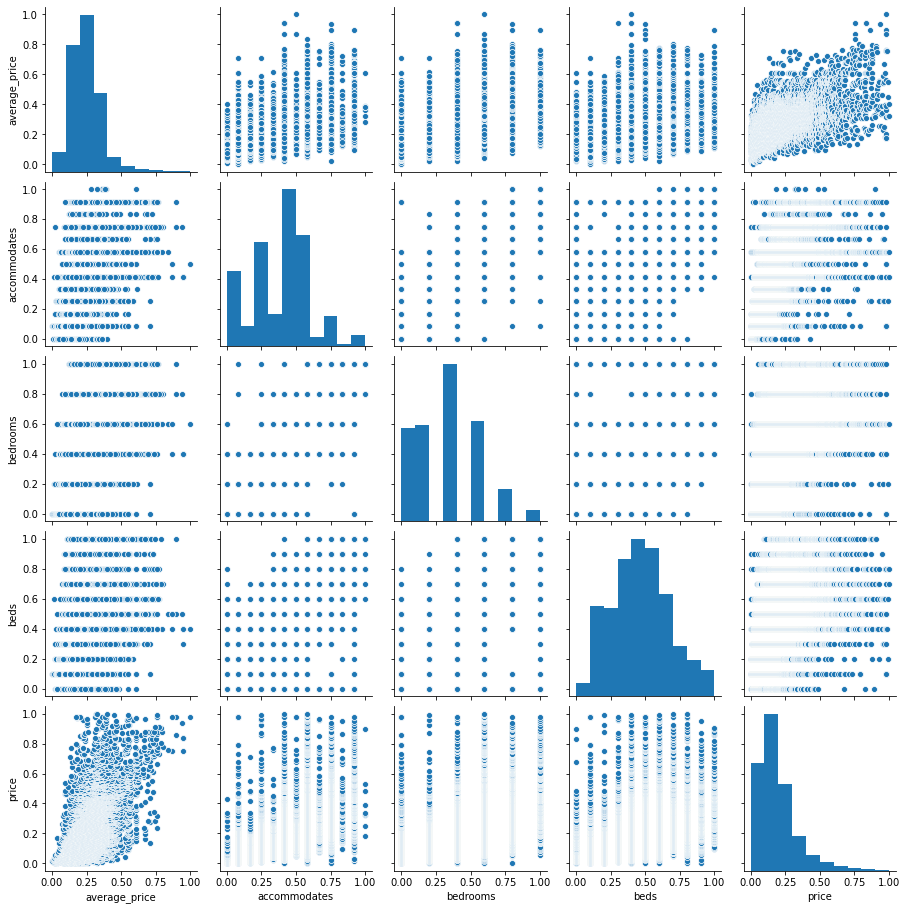

In [299]:
sns.pairplot(fDf)

Al no tener una gran correlación y no ser los modelos muy lineales, deberemos escoger un modelo con bajo bies y alta varianza. El "Decision tree".

### Elegido: Decision Tree

## 2.2 Selección de hiper-parámetros
En primer lugar lo que deberemos hacer es dividir los datos en datos de entrenamiento y en datos de prueba.

In [300]:
from sklearn.model_selection import train_test_split

test_size=0.2

X_train, X_test, y_train, y_test = train_test_split(
    fDf[['average_price',"accommodates","bedrooms","beds"]],
    fDf[['price']], test_size=test_size, random_state=42)

A continuación, usando GridSearch, buscaremos los mejores hiperparámetros para nuestro Decision Tree Regressor.

In [301]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(RMSE, greater_is_better=False)

params = {'max_depth': range(1, 10),
          'splitter' : ["best", "random"]}
reg = DecisionTreeRegressor()
gs_reg_DT = GridSearchCV(estimator=reg,
                         param_grid=params,
                         cv=5,
                         scoring=rmse_scorer)

print("Best parameters:")
gs_reg_DT.fit(X_train, y_train)
print(gs_reg_DT.best_params_)

Best parameters:
{'max_depth': 6, 'splitter': 'best'}


# Fase 3: Predicción y métricas

Una vez que ya hemos logrado dilucidar cuáles son los mejores hiper-parámetros para el model escogido, para cada una de las variables, procederemos a realizar la predicción con nuesto set de datos de entrenamiento para más tarde evaluar las métricas con nuestro set de datos de prueba.

In [328]:
reg_DT = DecisionTreeRegressor(max_depth = 6,
                               random_state=42)
reg_DT.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_train_pred = reg_DT.predict(X_train)
in_sample_error_DT = RMSE(y_train, y_train_pred)
print('In sample error for DT: {e}'.format(e=round(in_sample_error_DT, 3)))
print("Train Score:")
print(reg_DT.score(X_train, y_train))

y_test_pred = reg_DT.predict(X_test)
out_sample_error_DT = RMSE(y_test, y_test_pred)
print('Out sample error for DT: {e}'.format(e=round(out_sample_error_DT, 3)))
print("Test Score:")
print(reg_DT.score(X_test, y_test))

In sample error for DT: 0.098
Train Score:
0.5408231919651628
Out sample error for DT: 0.104
Test Score:
0.5158862299442869


No son malos datos, puesto que tenemos un margen de error de un 10% del precio máximo. Por tanto, con una variación del precio de nuestro set de datos tan alta, es posible que sólo lleguemos a hacer buenas predicciones para precios mayores que la media.

Este código se podrá encontrar en el siguiente repositorio:
www.github.com/Samsongas/UIB-MUSI-AA-B1-Final